[Pandas Tutorial: DataFrames in Python](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python) by 
Karlijn Willems @datacamp <br>
[資料科學家的 pandas 實戰手冊](https://leemeng.tw/practical-pandas-tutorial-for-aspiring-data-scientists.html)

## pandas 基礎

pandas是一個以python程式語言為基礎的開源軟體，主要用於資料分析，提供高效能、容易操作的資料結構。pandas不僅提供資料角力與準備，也可支援資料分析與建模。pandas可與統計分析(statsmodels)與機器學習(scikit-learn)軟體結合，提供廣泛的資料分析、資料探勘、機器學習、甚至人工智慧的應用。

pandas吸引人之處包括
* 快速有效率處理資料運作，如整合索引，「資料框」(dataframe)物件。
* 資料結構與不同的格式間，如CSV與文字檔、微軟Excel、SQL資料庫、及快速HDF5，的資料讀寫工具。
* 智慧型的資料對齊(data alignment)及遺失資料(missing data)整合處理；計算處理中自動標籤為主的對齊，以及將雜亂的資料整理成有次序的形式。
* 彈性地重新塑造資料維度(reshape)及資料集的樞紐分析(pivot)。
* 聰明的標籤為主的巨大資料集分割(slicing)、索引(indexing)、及建立子集(subsetting)。
* 資料結構欄位插入或刪除以獲取資料集大小可變性(size mutability)。
* 提供 group by 功能允許資料集的「分割合併」(split-apply-combine)運作，如彙總(aggregating)與轉化(transforming)資料。
* 高效能資料集合併與連結。
* 階層式軸向索引(Hierarchical axis indexing)提供直覺方式以低維度資料結構處理高維度資料。
* 時間序列功能；資料範圍產生與頻率轉換，移動視窗統計，移動視窗線性規劃，日期移動與滯後。建立特定領域的時間偏移並加入時間序列，而不會遺失數據；
* 使用Cython或C語言的核心模組提供高度效能最佳化。
* pandas的應用涵蓋學術及商用領域，包含財務分析、神經科學、經濟、統計、廣告、網頁分析...等。

In [3]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

## 建立物件

* 序列(陣列)
    * 資料欄，索引欄
* 資料框(DataFrame)-如同Excel資料表
    * 索引欄，資料，欄位

* ### 序列建立

In [53]:
s = pd.Series([1,3,5,np.nan,6,8]) #建立一個陣列(一維)
s.index=np.arange(1, 7)
s

1    1.0
2    3.0
3    5.0
4    NaN
5    6.0
6    8.0
dtype: float64

In [5]:
dates = pd.date_range('20180316',periods=6) #建立6個日期的陣列，起始日期2018-03-16
dates

DatetimeIndex(['2018-03-16', '2018-03-17', '2018-03-18', '2018-03-19',
               '2018-03-20', '2018-03-21'],
              dtype='datetime64[ns]', freq='D')

* ### 建立一個資料框(6列x4行)


    * 內容隨機產生
    * 列指標(index)為dates，前項建立
    * 行指標(columns)為A, B, C, D（欄位名稱）

In [6]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, 
                  columns=list('ABCD'))
df

,A,B,C,D
2018-03-16,-1.258660,0.704280,0.827179,-0.782008
2018-03-17,0.217891,0.710587,-2.034511,0.270329
2018-03-18,0.046274,0.352684,-0.536671,0.057468
2018-03-19,-0.417513,0.770996,-0.851330,2.655408
2018-03-20,-1.521994,-0.483859,-1.054864,0.032786
2018-03-21,-0.245079,0.969842,0.990601,0.026267


In [52]:
pd.DataFrame({'Yes': [50], 'No': [131]})

,Yes,No
0,50,131


* ### 運用pyhton字典資料結構建立資料框(4x6)


    * 6行，欄位名稱A, B, C, D, E, F(key值)
    * 第1行: 常數1.
    * 第2行: 日期標記
    * 第3行: pandas陣列-浮點數1，列標記為1, 2, 3, 4(range(4)產生)
    * 第4行: numpy 陣列 [3]x4
    * 第5行: 類別定義
    * 第6行: 字串常數('foo')

In [36]:
df2 = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20180316'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3]*4, dtype='int32'),
    'E': pd.Categorical(["test","train", "test", "train"]),
    'F': 'foo'
})
df2

,A,B,C,D,E,F
0,1.0,2018-03-16,1.0,3,test,foo
1,1.0,2018-03-16,1.0,3,train,foo
2,1.0,2018-03-16,1.0,3,test,foo
3,1.0,2018-03-16,1.0,3,train,foo


## 檢視資料

### 選取資料

In [9]:
df

,A,B,C,D
2018-03-16,-0.359652,0.159964,-0.195899,1.464912
2018-03-17,0.478085,-1.101392,-0.290549,0.052627
2018-03-18,-1.058797,-0.537155,0.534670,0.184854
2018-03-19,-0.761701,1.585182,-0.203488,1.080656
2018-03-20,-1.103490,1.616439,1.617957,0.871404
2018-03-21,-1.138078,-0.437311,0.815868,1.229924


In [10]:
df['A'] #選取行

2018-03-16   -0.359652
2018-03-17    0.478085
2018-03-18   -1.058797
2018-03-19   -0.761701
2018-03-20   -1.103490
2018-03-21   -1.138078
Freq: D, Name: A, dtype: float64

In [8]:
df.A

2018-03-16   -1.258660
2018-03-17    0.217891
2018-03-18    0.046274
2018-03-19   -0.417513
2018-03-20   -1.521994
2018-03-21   -0.245079
Freq: D, Name: A, dtype: float64

In [15]:
df[:3] #選取列

,A,B,C,D
2018-03-16,-1.258660,0.704280,0.827179,-0.782008
2018-03-17,0.217891,0.710587,-2.034511,0.270329
2018-03-18,0.046274,0.352684,-0.536671,0.057468


In [12]:
df['20180317':'20180320'] #選取列範圍

,A,B,C,D
2018-03-17,0.478085,-1.101392,-0.290549,0.052627
2018-03-18,-1.058797,-0.537155,0.534670,0.184854
2018-03-19,-0.761701,1.585182,-0.203488,1.080656
2018-03-20,-1.103490,1.616439,1.617957,0.871404


### 以標籤選取資料

以標記為參考的資料選取函數-DataFrame.loc()

In [17]:
df

,A,B,C,D
2018-03-16,-1.258660,0.704280,0.827179,-0.782008
2018-03-17,0.217891,0.710587,-2.034511,0.270329
2018-03-18,0.046274,0.352684,-0.536671,0.057468
2018-03-19,-0.417513,0.770996,-0.851330,2.655408
2018-03-20,-1.521994,-0.483859,-1.054864,0.032786
2018-03-21,-0.245079,0.969842,0.990601,0.026267


In [18]:
df.loc[dates[1]] #選擇特定列，顯示個欄位資料

A    0.217891
B    0.710587
C   -2.034511
D    0.270329
Name: 2018-03-17 00:00:00, dtype: float64

In [21]:
df.loc[:, ['A','B']] #選擇特定「A」及「B」兩欄位，「所有列」資料

,A,B
2018-03-16,-1.258660,0.704280
2018-03-17,0.217891,0.710587
2018-03-18,0.046274,0.352684
2018-03-19,-0.417513,0.770996
2018-03-20,-1.521994,-0.483859
2018-03-21,-0.245079,0.969842


In [14]:
df.loc['20180319':'20180322', ['A','B']]

,A,B
2018-03-19,-0.761701,1.585182
2018-03-20,-1.103490,1.616439
2018-03-21,-1.138078,-0.437311


In [15]:
df.loc[dates[2], 'B']

-0.53715490667492871

In [16]:
df.at[dates[2],'B'] #選擇特定某一個資料，DataFrame.at()函數

-0.53715490667492871

### 以位置選取資料
DataFrame.iloc()函數來選取資料框中的資料

In [22]:
df

,A,B,C,D
2018-03-16,-1.258660,0.704280,0.827179,-0.782008
2018-03-17,0.217891,0.710587,-2.034511,0.270329
2018-03-18,0.046274,0.352684,-0.536671,0.057468
2018-03-19,-0.417513,0.770996,-0.851330,2.655408
2018-03-20,-1.521994,-0.483859,-1.054864,0.032786
2018-03-21,-0.245079,0.969842,0.990601,0.026267


In [23]:
df.iloc[3]

A   -0.417513
B    0.770996
C   -0.851330
D    2.655408
Name: 2018-03-19 00:00:00, dtype: float64

In [24]:
df.iloc[3:5, 0:2]

,A,B
2018-03-19,-0.417513,0.770996
2018-03-20,-1.521994,-0.483859


In [21]:
df.iloc[[1,2,4],[0,2,3]]

,A,C,D
2018-03-17,0.478085,-0.290549,0.052627
2018-03-18,-1.058797,0.534670,0.184854
2018-03-20,-1.103490,1.617957,0.871404


In [22]:
df.iloc[1:3, :]

,A,B,C,D
2018-03-17,0.478085,-1.101392,-0.290549,0.052627
2018-03-18,-1.058797,-0.537155,0.534670,0.184854


In [23]:
df.iloc[:, 1:3]

,B,C
2018-03-16,0.159964,-0.195899
2018-03-17,-1.101392,-0.290549
2018-03-18,-0.537155,0.534670
2018-03-19,1.585182,-0.203488
2018-03-20,1.616439,1.617957
2018-03-21,-0.437311,0.815868


In [25]:
df.iloc[1,1]

0.7105865784142033

In [26]:
df.iat[1,1]

0.7105865784142033

### 以邏輯值索引

In [24]:
df

,A,B,C,D
2018-03-16,-0.359652,0.159964,-0.195899,1.464912
2018-03-17,0.478085,-1.101392,-0.290549,0.052627
2018-03-18,-1.058797,-0.537155,0.534670,0.184854
2018-03-19,-0.761701,1.585182,-0.203488,1.080656
2018-03-20,-1.103490,1.616439,1.617957,0.871404
2018-03-21,-1.138078,-0.437311,0.815868,1.229924


In [25]:
df[df.A>0]

,A,B,C,D
2018-03-17,0.478085,-1.101392,-0.290549,0.052627


In [26]:
df[df>0]

,A,B,C,D
2018-03-16,NaN,0.159964,NaN,1.464912
2018-03-17,0.478085,NaN,NaN,0.052627
2018-03-18,NaN,NaN,0.534670,0.184854
2018-03-19,NaN,1.585182,NaN,1.080656
2018-03-20,NaN,1.616439,1.617957,0.871404
2018-03-21,NaN,NaN,0.815868,1.229924


### 拷貝資料框

In [28]:
df2 = df.copy() #拷貝資料框函數
df2

,A,B,C,D
2018-03-16,-1.258660,0.704280,0.827179,-0.782008
2018-03-17,0.217891,0.710587,-2.034511,0.270329
2018-03-18,0.046274,0.352684,-0.536671,0.057468
2018-03-19,-0.417513,0.770996,-0.851330,2.655408
2018-03-20,-1.521994,-0.483859,-1.054864,0.032786
2018-03-21,-0.245079,0.969842,0.990601,0.026267


In [29]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three'] #新增一個欄位D，指定新值
df2

,A,B,C,D,E
2018-03-16,-1.258660,0.704280,0.827179,-0.782008,one
2018-03-17,0.217891,0.710587,-2.034511,0.270329,one
2018-03-18,0.046274,0.352684,-0.536671,0.057468,two
2018-03-19,-0.417513,0.770996,-0.851330,2.655408,three
2018-03-20,-1.521994,-0.483859,-1.054864,0.032786,four
2018-03-21,-0.245079,0.969842,0.990601,0.026267,three


In [31]:
df2[df2['E'].isin(['three'])]

,A,B,C,D,E
2018-03-19,-0.761701,1.585182,-0.203488,1.080656,three
2018-03-21,-1.138078,-0.437311,0.815868,1.229924,three


## 資料內容設定

In [32]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20180327', periods=6))
s1

2018-03-27    1
2018-03-28    2
2018-03-29    3
2018-03-30    4
2018-03-31    5
2018-04-01    6
Freq: D, dtype: int64

In [33]:
df

,A,B,C,D
2018-03-16,-0.359652,0.159964,-0.195899,1.464912
2018-03-17,0.478085,-1.101392,-0.290549,0.052627
2018-03-18,-1.058797,-0.537155,0.534670,0.184854
2018-03-19,-0.761701,1.585182,-0.203488,1.080656
2018-03-20,-1.103490,1.616439,1.617957,0.871404
2018-03-21,-1.138078,-0.437311,0.815868,1.229924


In [34]:
df.at[dates[1], 'A'] = 0
df

,A,B,C,D
2018-03-16,-0.359652,0.159964,-0.195899,1.464912
2018-03-17,0.000000,-1.101392,-0.290549,0.052627
2018-03-18,-1.058797,-0.537155,0.534670,0.184854
2018-03-19,-0.761701,1.585182,-0.203488,1.080656
2018-03-20,-1.103490,1.616439,1.617957,0.871404
2018-03-21,-1.138078,-0.437311,0.815868,1.229924


In [35]:
df.iat[2,2] = 1.0
df

,A,B,C,D
2018-03-16,-0.359652,0.159964,-0.195899,1.464912
2018-03-17,0.000000,-1.101392,-0.290549,0.052627
2018-03-18,-1.058797,-0.537155,1.000000,0.184854
2018-03-19,-0.761701,1.585182,-0.203488,1.080656
2018-03-20,-1.103490,1.616439,1.617957,0.871404
2018-03-21,-1.138078,-0.437311,0.815868,1.229924


In [36]:
df.loc[:,'D'] = np.array([5]*len(df))

In [37]:
df

,A,B,C,D
2018-03-16,-0.359652,0.159964,-0.195899,5
2018-03-17,0.000000,-1.101392,-0.290549,5
2018-03-18,-1.058797,-0.537155,1.000000,5
2018-03-19,-0.761701,1.585182,-0.203488,5
2018-03-20,-1.103490,1.616439,1.617957,5
2018-03-21,-1.138078,-0.437311,0.815868,5


In [38]:
df2 = df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D
2018-03-16,-0.359652,-0.159964,-0.195899,-5
2018-03-17,0.000000,-1.101392,-0.290549,-5
2018-03-18,-1.058797,-0.537155,-1.000000,-5
2018-03-19,-0.761701,-1.585182,-0.203488,-5
2018-03-20,-1.103490,-1.616439,-1.617957,-5
2018-03-21,-1.138078,-0.437311,-0.815868,-5


### 遺漏值(missing values)

In [39]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns)+['E'])
df1

,A,B,C,D,E
2018-03-16,-0.359652,0.159964,-0.195899,5,NaN
2018-03-17,0.000000,-1.101392,-0.290549,5,NaN
2018-03-18,-1.058797,-0.537155,1.000000,5,NaN
2018-03-19,-0.761701,1.585182,-0.203488,5,NaN


In [40]:
df1.loc[dates[0]:dates[1], 'E']=1

In [41]:
df1

,A,B,C,D,E
2018-03-16,-0.359652,0.159964,-0.195899,5,1.0
2018-03-17,0.000000,-1.101392,-0.290549,5,1.0
2018-03-18,-1.058797,-0.537155,1.000000,5,NaN
2018-03-19,-0.761701,1.585182,-0.203488,5,NaN


In [42]:
df1.dropna(how='any')

,A,B,C,D,E
2018-03-16,-0.359652,0.159964,-0.195899,5,1.0
2018-03-17,0.000000,-1.101392,-0.290549,5,1.0


In [43]:
df1.fillna(value=6)

,A,B,C,D,E
2018-03-16,-0.359652,0.159964,-0.195899,5,1.0
2018-03-17,0.000000,-1.101392,-0.290549,5,1.0
2018-03-18,-1.058797,-0.537155,1.000000,5,6.0
2018-03-19,-0.761701,1.585182,-0.203488,5,6.0


In [44]:
pd.isna(df1) #isna()???

AttributeError: module 'pandas' has no attribute 'isna'

## 資料操作

### 統計操作

In [39]:
df

,A,B,C,D
2018-03-16,0.160816,0.000000,0.293871,5
2018-03-17,0.000000,0.700453,-0.722318,5
2018-03-18,-0.202739,-1.289026,-2.574132,5
2018-03-19,0.844014,-0.708118,1.001973,5
2018-03-20,1.764418,-1.280253,-0.085597,5
2018-03-21,-0.083471,-1.732204,0.130521,5


In [47]:
df.mean(axis=0) #以欄為主

A   -0.736953
B    0.214288
C    0.457315
D    5.000000
dtype: float64

In [46]:
df.mean(axis=1) #以列為主

2018-03-16    1.151103
2018-03-17    0.902015
2018-03-18    1.101012
2018-03-19    1.404998
2018-03-20    1.782727
2018-03-21    1.060120
Freq: D, dtype: float64

In [48]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2018-03-16    NaN
2018-03-17    NaN
2018-03-18    1.0
2018-03-19    3.0
2018-03-20    5.0
2018-03-21    NaN
Freq: D, dtype: float64

In [49]:
df

,A,B,C,D
2018-03-16,-0.359652,0.159964,-0.195899,5
2018-03-17,0.000000,-1.101392,-0.290549,5
2018-03-18,-1.058797,-0.537155,1.000000,5
2018-03-19,-0.761701,1.585182,-0.203488,5
2018-03-20,-1.103490,1.616439,1.617957,5
2018-03-21,-1.138078,-0.437311,0.815868,5


In [50]:
df.sub(s, axis='index')

,A,B,C,D
2018-03-16,NaN,NaN,NaN,NaN
2018-03-17,NaN,NaN,NaN,NaN
2018-03-18,-2.058797,-1.537155,0.000000,4.0
2018-03-19,-3.761701,-1.414818,-3.203488,2.0
2018-03-20,-6.103490,-3.383561,-3.382043,0.0
2018-03-21,NaN,NaN,NaN,NaN


### Apply 函數

In [51]:
df

,A,B,C,D
2018-03-16,-0.359652,0.159964,-0.195899,5
2018-03-17,0.000000,-1.101392,-0.290549,5
2018-03-18,-1.058797,-0.537155,1.000000,5
2018-03-19,-0.761701,1.585182,-0.203488,5
2018-03-20,-1.103490,1.616439,1.617957,5
2018-03-21,-1.138078,-0.437311,0.815868,5


In [52]:
df.apply(np.cumsum)

,A,B,C,D
2018-03-16,-0.359652,0.159964,-0.195899,5
2018-03-17,-0.359652,-0.941428,-0.486448,10
2018-03-18,-1.418449,-1.478583,0.513552,15
2018-03-19,-2.180151,0.106599,0.310064,20
2018-03-20,-3.283641,1.723038,1.928021,25
2018-03-21,-4.421719,1.285727,2.743890,30


In [53]:
df.apply(lambda x: x.max() - x.min())

A    1.138078
B    2.717831
C    1.908507
D    0.000000
dtype: float64

### Histogramming

In [54]:
s = pd.Series(np.random.randint(0,7, size=10))
s

0    5
1    5
2    5
3    5
4    5
5    6
6    4
7    0
8    0
9    0
dtype: int64

In [55]:
s.value_counts()

5    5
0    3
6    1
4    1
dtype: int64

### 字串操作

In [56]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### 合併

In [59]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,1.683028,-1.214314,0.745200,-1.681760
1,0.364137,1.577420,1.981463,1.264785
2,-1.538098,0.375261,1.514630,0.679046
3,0.984460,-0.627754,0.883459,0.830768
4,1.964961,0.316753,0.015481,0.381238
5,-0.357890,0.664336,0.305271,-0.862504
6,-2.466906,-1.122980,-0.227785,-1.274315
7,-0.594713,-1.651442,0.440571,-3.221271
8,0.919291,1.081885,1.123521,-0.674853
9,-1.132799,-0.158141,0.642817,1.521137


In [60]:
piece = [df[0:3], df[2:5], df[7:]]

In [61]:
pd.concat(piece)

,0,1,2,3
0,1.683028,-1.214314,0.745200,-1.681760
1,0.364137,1.577420,1.981463,1.264785
2,-1.538098,0.375261,1.514630,0.679046
2,-1.538098,0.375261,1.514630,0.679046
3,0.984460,-0.627754,0.883459,0.830768
4,1.964961,0.316753,0.015481,0.381238
7,-0.594713,-1.651442,0.440571,-3.221271
8,0.919291,1.081885,1.123521,-0.674853
9,-1.132799,-0.158141,0.642817,1.521137


### 結合(join)

In [62]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval':[1,2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval':[4,5]})

In [63]:
left

,key,lval
0,foo,1
1,bar,2


In [64]:
right

,key,rval
0,foo,4
1,bar,5


In [65]:
pd.merge(left, right, on = 'key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append

In [66]:
df = pd.DataFrame(np.random.randn(8, 4), columns=list('ABCD'))
df

,A,B,C,D
0,0.485536,-2.239065,-0.914521,-0.325772
1,-0.138663,1.322081,-0.277971,-0.333110
2,-1.961590,-0.262005,-0.185384,0.743138
3,0.178744,0.612691,-0.363240,-0.768306
4,-0.757829,-0.097865,1.095363,0.521598
5,-1.205657,-1.479724,-1.373253,0.403384
6,0.822906,0.917645,-0.194605,1.686555
7,-0.706142,0.917848,0.789520,0.651161


In [67]:
s = df.iloc[3]
s

A    0.178744
B    0.612691
C   -0.363240
D   -0.768306
Name: 3, dtype: float64

In [68]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.485536,-2.239065,-0.914521,-0.325772
1,-0.138663,1.322081,-0.277971,-0.333110
2,-1.961590,-0.262005,-0.185384,0.743138
3,0.178744,0.612691,-0.363240,-0.768306
4,-0.757829,-0.097865,1.095363,0.521598
5,-1.205657,-1.479724,-1.373253,0.403384
6,0.822906,0.917645,-0.194605,1.686555
7,-0.706142,0.917848,0.789520,0.651161
8,0.178744,0.612691,-0.363240,-0.768306


### 分類

In [69]:
df = pd.DataFrame({
    'A':['foo',  'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
    'C' : np.random.randn(8),
    'D' : np.random.randn(8)
})
df

,A,B,C,D
0,foo,one,-0.071532,-0.504405
1,bar,one,-0.806180,-0.227700
2,foo,two,1.020278,-0.884216
3,bar,three,-1.756285,-0.862206
4,foo,two,1.116155,1.171317
5,bar,two,-0.718694,0.979897
6,foo,one,0.775701,-0.910184
7,foo,three,-0.284481,0.445219


In [70]:
df.groupby("A").sum()

,C,D
A,,
bar,-3.281159,-0.110009
foo,2.556121,-0.682269


In [62]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.525728 -1.362651
    three -1.431769  0.848752
    two    0.841472  0.121316
foo one    1.332834  0.266991
    three -0.724004  0.011930
    two    0.043667 -2.006570

### 重塑形狀

In [71]:
tuples = list(zip(*[
    ['bar', 'bar', 'baz', 'baz','foo', 'foo', 'qux', 'qux'],
    ['one', 'two', 'one', 'two','one', 'two', 'one', 'two']
]))

In [72]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [74]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [75]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one     0.785566  0.567384
      two    -0.724800 -0.570498
baz   one     0.859736 -1.241897
      two     0.694696  1.259171
foo   one    -0.111929  0.318756
      two    -0.023227  0.648948
qux   one    -1.159499 -0.622742
      two     0.506448 -0.273495

In [76]:
df

A         B
first second                    
bar   one     0.785566  0.567384
      two    -0.724800 -0.570498
baz   one     0.859736 -1.241897
      two     0.694696  1.259171
foo   one    -0.111929  0.318756
      two    -0.023227  0.648948
qux   one    -1.159499 -0.622742
      two     0.506448 -0.273495

In [77]:
df2 = df[:4]

In [78]:
df2

A         B
first second                    
bar   one     0.785566  0.567384
      two    -0.724800 -0.570498
baz   one     0.859736 -1.241897
      two     0.694696  1.259171

In [79]:
stacked = df2.stack()

In [80]:
stacked

first  second   
bar    one     A    0.785566
               B    0.567384
       two     A   -0.724800
               B   -0.570498
baz    one     A    0.859736
               B   -1.241897
       two     A    0.694696
               B    1.259171
dtype: float64

In [82]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.785566  0.859736
       B  0.567384 -1.241897
two    A -0.724800  0.694696
       B -0.570498  1.259171

In [83]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.785566 -0.724800
      B  0.567384 -0.570498
baz   A  0.859736  0.694696
      B -1.241897  1.259171

In [74]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.025357  0.149481
       B  0.366682 -2.218202
two    A -0.889499  0.927086
       B  1.377849  0.067912

### pivot Tables

In [84]:
df = pd.DataFrame({
    'A' : ['one', 'one', 'two', 'three'] * 3,
    'B' : ['A', 'B', 'C'] * 4,
    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
    'D' : np.random.randn(12),
    'E' : np.random.randn(12)
})

In [76]:
df

,A,B,C,D,E
0,one,A,foo,-0.729896,0.774352
1,one,B,foo,-0.380613,1.792264
2,two,C,foo,0.183524,-1.154514
3,three,A,bar,0.154714,0.118262
4,one,B,bar,0.494463,-1.002510
5,one,C,bar,-1.005956,-0.271873
6,two,A,foo,0.481468,-0.456640
7,three,B,foo,-0.906866,-0.317530
8,one,C,foo,0.831762,1.262781
9,one,A,bar,-0.918092,1.549619


In [85]:
#樞紐操作
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.747276 -2.146429
      B  0.558192 -0.663717
      C -0.594419  0.160984
three A  1.657166       NaN
      B       NaN -0.706834
      C  1.248179       NaN
two   A       NaN -0.215839
      B  0.170183       NaN
      C       NaN  0.856801

## 時間序列

In [86]:
rng = pd.date_range('1/1/2010', periods=100, freq='S') #sec

In [87]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [88]:
ts

2010-01-01 00:00:00     12
2010-01-01 00:00:01    388
2010-01-01 00:00:02    387
2010-01-01 00:00:03    399
2010-01-01 00:00:04    414
2010-01-01 00:00:05    266
2010-01-01 00:00:06    449
2010-01-01 00:00:07     49
2010-01-01 00:00:08    483
2010-01-01 00:00:09    310
2010-01-01 00:00:10     13
2010-01-01 00:00:11    296
2010-01-01 00:00:12     88
2010-01-01 00:00:13    234
2010-01-01 00:00:14     30
2010-01-01 00:00:15    493
2010-01-01 00:00:16    110
2010-01-01 00:00:17    297
2010-01-01 00:00:18    396
2010-01-01 00:00:19    426
2010-01-01 00:00:20     21
2010-01-01 00:00:21    378
2010-01-01 00:00:22    457
2010-01-01 00:00:23    190
2010-01-01 00:00:24    172
2010-01-01 00:00:25    277
2010-01-01 00:00:26    482
2010-01-01 00:00:27     30
2010-01-01 00:00:28    181
2010-01-01 00:00:29    449
                      ... 
2010-01-01 00:01:10    213
2010-01-01 00:01:11     95
2010-01-01 00:01:12    125
2010-01-01 00:01:13     28
2010-01-01 00:01:14     84
2010-01-01 00:01:15    461
2

In [89]:
ts.resample('5Min').sum() #???

2010-01-01    25897
Freq: 5T, dtype: int64

In [82]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    1.908925
2012-03-07    0.958240
2012-03-08    0.057476
2012-03-09    1.419795
2012-03-10   -0.328213
Freq: D, dtype: float64

In [83]:
ts.utc = ts.tz_localize('UTC')
ts.utc

2012-03-06 00:00:00+00:00    1.908925
2012-03-07 00:00:00+00:00    0.958240
2012-03-08 00:00:00+00:00    0.057476
2012-03-09 00:00:00+00:00    1.419795
2012-03-10 00:00:00+00:00   -0.328213
Freq: D, dtype: float64

In [84]:
ts.utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    1.908925
2012-03-06 19:00:00-05:00    0.958240
2012-03-07 19:00:00-05:00    0.057476
2012-03-08 19:00:00-05:00    1.419795
2012-03-09 19:00:00-05:00   -0.328213
Freq: D, dtype: float64

In [85]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    2.589952
2012-02-29   -1.839338
2012-03-31   -0.212737
2012-04-30    0.724491
2012-05-31    1.117347
Freq: M, dtype: float64

In [86]:
ps = ts.to_period()
ps

2012-01    2.589952
2012-02   -1.839338
2012-03   -0.212737
2012-04    0.724491
2012-05    1.117347
Freq: M, dtype: float64

In [87]:
ps.to_timestamp()

2012-01-01    2.589952
2012-02-01   -1.839338
2012-03-01   -0.212737
2012-04-01    0.724491
2012-05-01    1.117347
Freq: MS, dtype: float64

In [90]:
prng = pd.period_range('2015Q1', '2016Q4', freq='Q-NOV')

In [91]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [92]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [93]:
ts.head()

2015-03-01 09:00   -0.407961
2015-06-01 09:00    0.062660
2015-09-01 09:00    0.389753
2015-12-01 09:00    0.806492
2016-03-01 09:00   -1.575077
Freq: H, dtype: float64

## 類別

In [110]:
df = pd.DataFrame({
    "id":[1,2,3,4,5,6],
    "raw_grade":['a','b','b','a','a','e']
})

In [111]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [112]:
df["grade"]=df["raw_grade"].astype("category")

In [113]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [115]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [116]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [117]:
df["grade"]=df["grade"].cat.set_categories([
    "very bad", "bad", "medium", "good", "very good"
])

In [118]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [119]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [120]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### 繪圖

In [121]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2014', periods=1000))

In [122]:
ts

2014-01-01    1.423514
2014-01-02    3.173075
2014-01-03   -0.001039
2014-01-04   -0.864290
2014-01-05   -0.614327
2014-01-06   -1.001846
2014-01-07    0.173898
2014-01-08   -0.771910
2014-01-09    1.195219
2014-01-10   -0.343372
2014-01-11    1.070341
2014-01-12    0.171088
2014-01-13   -0.636765
2014-01-14    1.255854
2014-01-15    1.131434
2014-01-16   -0.288231
2014-01-17    0.615042
2014-01-18    1.021253
2014-01-19    0.233042
2014-01-20   -1.547061
2014-01-21   -0.889999
2014-01-22   -1.135237
2014-01-23    0.320475
2014-01-24    0.592428
2014-01-25    1.412519
2014-01-26    0.174687
2014-01-27    1.169837
2014-01-28    0.026885
2014-01-29   -0.549432
2014-01-30   -1.492483
                ...   
2016-08-28   -0.040978
2016-08-29    0.046856
2016-08-30    0.184811
2016-08-31    1.426342
2016-09-01   -0.266686
2016-09-02   -0.751284
2016-09-03   -0.187499
2016-09-04    0.231157
2016-09-05   -1.685133
2016-09-06   -0.014337
2016-09-07   -1.091532
2016-09-08   -0.252718
2016-09-09 

In [123]:
ts = ts.cumsum()

In [124]:
ts

2014-01-01     1.423514
2014-01-02     4.596589
2014-01-03     4.595550
2014-01-04     3.731260
2014-01-05     3.116933
2014-01-06     2.115087
2014-01-07     2.288985
2014-01-08     1.517075
2014-01-09     2.712294
2014-01-10     2.368921
2014-01-11     3.439262
2014-01-12     3.610350
2014-01-13     2.973585
2014-01-14     4.229439
2014-01-15     5.360873
2014-01-16     5.072642
2014-01-17     5.687684
2014-01-18     6.708937
2014-01-19     6.941979
2014-01-20     5.394918
2014-01-21     4.504919
2014-01-22     3.369683
2014-01-23     3.690158
2014-01-24     4.282587
2014-01-25     5.695106
2014-01-26     5.869793
2014-01-27     7.039630
2014-01-28     7.066515
2014-01-29     6.517083
2014-01-30     5.024600
                ...    
2016-08-28    41.220414
2016-08-29    41.267270
2016-08-30    41.452081
2016-08-31    42.878423
2016-09-01    42.611738
2016-09-02    41.860454
2016-09-03    41.672955
2016-09-04    41.904112
2016-09-05    40.218979
2016-09-06    40.204641
2016-09-07    39

<IPython.core.display.Javascript object>


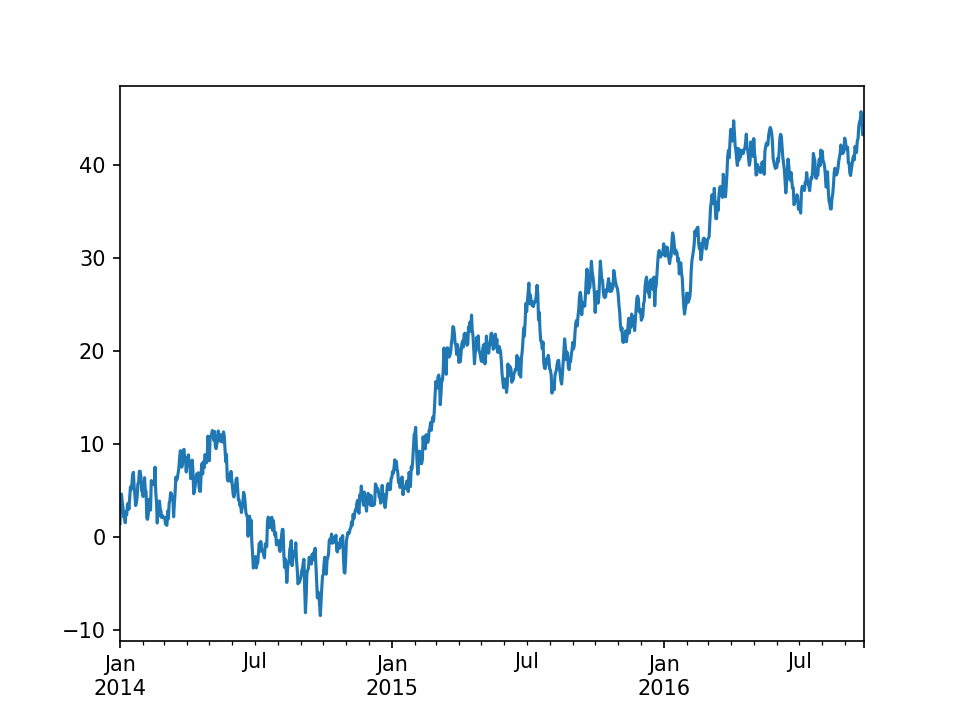

In [125]:
ts.plot()

In [128]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df

,A,B,C,D
2014-01-01,-0.479658,0.396055,1.165733,-0.864409
2014-01-02,-0.788294,0.073181,1.058364,-0.040372
2014-01-03,0.644527,1.027377,2.488346,0.692574
2014-01-04,0.927220,0.592053,4.429319,0.235727
2014-01-05,1.011388,-0.416758,3.451525,0.963621
2014-01-06,-0.219659,-0.891972,3.149961,3.437276
2014-01-07,-1.611820,-0.161235,2.864220,3.726885
2014-01-08,-0.352030,-0.265161,1.395815,4.810832
2014-01-09,-1.482869,0.846983,0.342538,6.602738
2014-01-10,-2.402350,2.689195,1.405739,4.864557


<IPython.core.display.Javascript object>


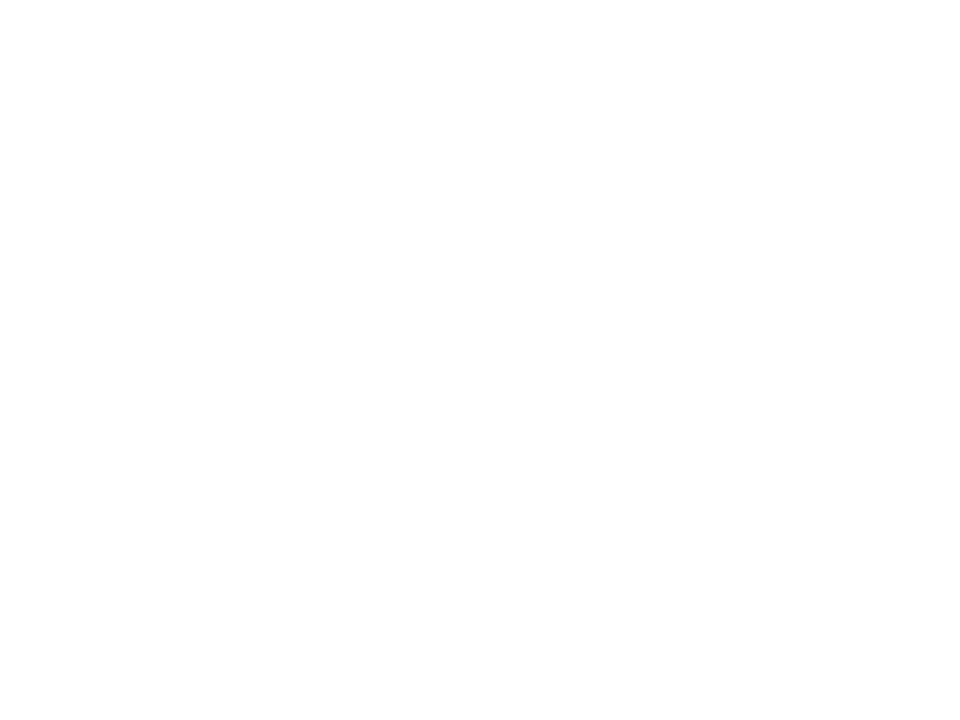

<IPython.core.display.Javascript object>


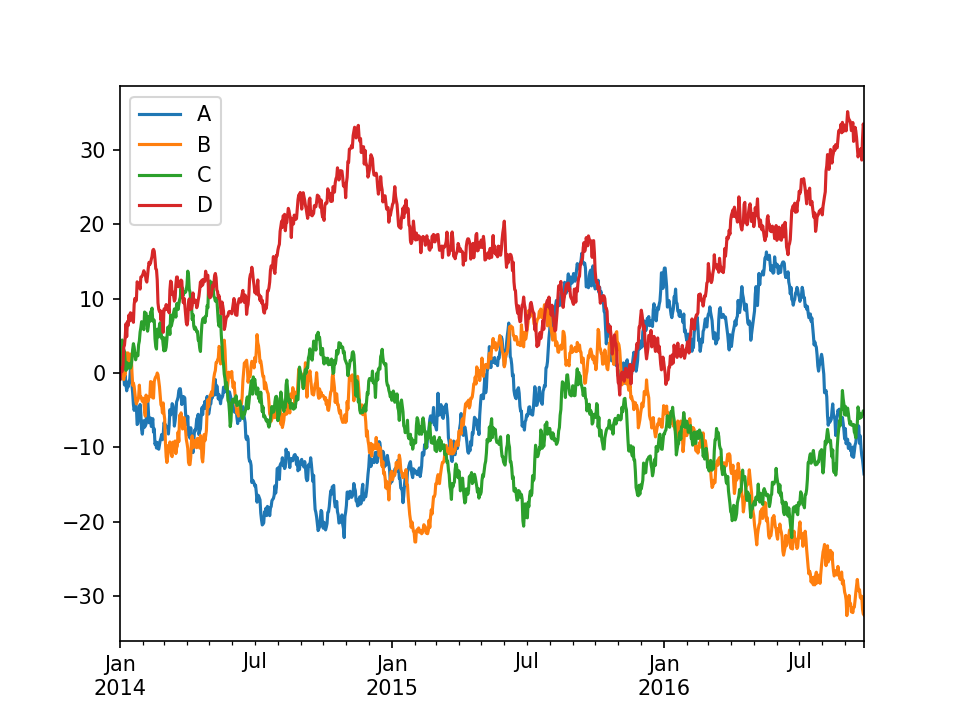

In [129]:
plt.figure(); df.plot(); plt.legend(loc='best')

## 資料檔案I/O

### CSV檔

In [130]:
df

,A,B,C,D
2014-01-01,-0.479658,0.396055,1.165733,-0.864409
2014-01-02,-0.788294,0.073181,1.058364,-0.040372
2014-01-03,0.644527,1.027377,2.488346,0.692574
2014-01-04,0.927220,0.592053,4.429319,0.235727
2014-01-05,1.011388,-0.416758,3.451525,0.963621
2014-01-06,-0.219659,-0.891972,3.149961,3.437276
2014-01-07,-1.611820,-0.161235,2.864220,3.726885
2014-01-08,-0.352030,-0.265161,1.395815,4.810832
2014-01-09,-1.482869,0.846983,0.342538,6.602738
2014-01-10,-2.402350,2.689195,1.405739,4.864557


In [131]:
df.to_csv('xxx.csv')

In [132]:
dfxxx = pd.read_csv('xxx.csv')

In [133]:
dfxxx

,Unnamed: 0,A,B,C,D
0,2014-01-01,-0.479658,0.396055,1.165733,-0.864409
1,2014-01-02,-0.788294,0.073181,1.058364,-0.040372
2,2014-01-03,0.644527,1.027377,2.488346,0.692574
3,2014-01-04,0.927220,0.592053,4.429319,0.235727
4,2014-01-05,1.011388,-0.416758,3.451525,0.963621
5,2014-01-06,-0.219659,-0.891972,3.149961,3.437276
6,2014-01-07,-1.611820,-0.161235,2.864220,3.726885
7,2014-01-08,-0.352030,-0.265161,1.395815,4.810832
8,2014-01-09,-1.482869,0.846983,0.342538,6.602738
9,2014-01-10,-2.402350,2.689195,1.405739,4.864557


### Excel 檔

In [134]:
df.to_excel('xxx.xlsx', sheet_name = 'Sheet1')

In [135]:
pd.read_excel('xxx.xlsx', 'Sheet1', index_col=None,na_values=['NA'])

,A,B,C,D
2014-01-01,-0.479658,0.396055,1.165733,-0.864409
2014-01-02,-0.788294,0.073181,1.058364,-0.040372
2014-01-03,0.644527,1.027377,2.488346,0.692574
2014-01-04,0.927220,0.592053,4.429319,0.235727
2014-01-05,1.011388,-0.416758,3.451525,0.963621
2014-01-06,-0.219659,-0.891972,3.149961,3.437276
2014-01-07,-1.611820,-0.161235,2.864220,3.726885
2014-01-08,-0.352030,-0.265161,1.395815,4.810832
2014-01-09,-1.482869,0.846983,0.342538,6.602738
2014-01-10,-2.402350,2.689195,1.405739,4.864557
